In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
import mpld3
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.tools import FigureFactory as FF
tls.set_credentials_file(username='mmainzer', api_key='1fhs3tcl9m')

from IPython.display import HTML

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import os
from scipy.cluster.hierarchy import fcluster

In [2]:
df = pd.read_csv('../../assets/capstone-assets/CCRPI/master.csv')

In [3]:
df.head()

/Users/michaelmainzer/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning:

DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.

/Users/michaelmainzer/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning:

PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.



,Unnamed: 0,year,sysID,sysName,schoolID,schoolName,grd,ccrpi,street,city,...,pctNative,pctBlck,pctHisp,pctMulti,pctWhite,pctMigrant,pctSPED,pctESOL,pctAltProg,pctGiftd
0,0,2015,601,Appling County,103,Appling County High School,H,73.6,482 Blackshear Hwy,Baxley,...,0,22,11,2,64,4,12.7,1.3,6.8,6.8
1,1,2015,601,Appling County,177,Appling County Elementary School,E,68.8,680 Blackshear Hwy,Baxley,...,0,29,19,4,47,7,12.8,8.7,0.0,2.0
2,2,2015,601,Appling County,195,Appling County Middle School,M,68.8,2997 Blackshear Hwy,Baxley,...,0,22,12,4,62,4,11.2,1.4,2.2,7.0
3,4,2015,601,Appling County,1050,Altamaha Elementary School,E,72.3,344 Altamaha School Rd,Baxley,...,0,6,6,2,86,2,13.2,4.1,0.0,6.2
4,5,2015,601,Appling County,5050,Fourth District Elementary School,E,68.2,13396 Blackshear Hwy,Surrency,...,0,9,9,5,78,5,8.6,2.6,0.0,2.0


In [4]:
df.locClass.fillna(21, inplace=True)

In [5]:
df.pctGiftd.fillna(0, inplace=True)

In [6]:
#Normalize the feature columns so the x axes in our subplots are all on the same scale.
cols_to_norm = ['stdTchRatio', 'expPerStudent','salBenSum','freeLnch','reducedLnch','pctMobile','pctAbs5orLess',
                'pctAbsSix-Fiftn', 'expPerStudent','salBenSum','freeLnch','reducedLnch','pctMobile','pctAbs5orLess',
                'pctAbsSix-Fiftn', 'pctOverFiftn','pctSnapTanfHmls', 'pctAsian','pctNative','pctBlck','pctHisp',
                'pctMulti','pctWhite','pctMigrant','pctSPED','pctESOL','pctAltProg','pctGiftd']

df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))

In [7]:
df2 = df[['ccrpi', 'sysID','sysName','schoolID','schoolName', 'grd', 'locClass','titleI','chrtr','stdTchRatio',
          'expPerStudent','salBenSum','freeLnch','reducedLnch','pctMobile','pctAbs5orLess','pctAbsSix-Fiftn',
          'pctOverFiftn','pctSnapTanfHmls', 'pctAsian','pctNative','pctBlck','pctHisp','pctMulti','pctWhite',
         'pctMigrant','pctSPED','pctESOL','pctAltProg','pctGiftd']]

In [8]:
df2.head(1)

,ccrpi,sysID,sysName,schoolID,schoolName,grd,locClass,titleI,chrtr,stdTchRatio,...,pctNative,pctBlck,pctHisp,pctMulti,pctWhite,pctMigrant,pctSPED,pctESOL,pctAltProg,pctGiftd
0,73.6,601,Appling County,103,Appling County High School,H,33.0,No,No,-0.00133,...,-0.026553,-0.149997,-0.017973,-0.117462,0.202852,0.194902,0.023484,-0.046515,0.051644,-0.04831


In [9]:
df2.tail(50)

,ccrpi,sysID,sysName,schoolID,schoolName,grd,locClass,titleI,chrtr,stdTchRatio,...,pctNative,pctBlck,pctHisp,pctMulti,pctWhite,pctMigrant,pctSPED,pctESOL,pctAltProg,pctGiftd
1833,77.0,776,Gainesville City,3050,Gainesville High School,H,13.0,Yes,No,-0.000836,...,-0.026553,-0.170199,0.429943,-0.117462,-0.246128,0.037007,-0.037214,0.049639,-0.015356,0.057202
1834,81.7,779,Jefferson City,101,Jefferson Middle School,M,31.0,Yes,No,-0.000380,...,-0.026553,-0.291411,-0.038807,-0.026553,0.345709,-0.015625,-0.025075,-0.046515,-0.016356,0.148541
1835,84.9,779,Jefferson City,107,Jefferson Academy,E,31.0,Yes,No,-0.000380,...,-0.026553,-0.271209,-0.038807,-0.117462,0.345709,-0.015625,-0.025075,-0.034976,-0.015356,0.028856
1836,95.6,779,Jefferson City,174,Jefferson High School,H,31.0,No,No,-0.000456,...,-0.026553,-0.291411,-0.049223,-0.117462,0.366117,-0.015625,-0.028110,-0.051643,-0.012356,0.101297
1837,66.4,781,Marietta City,188,Burruss Elementary School,E,13.0,Yes,No,-0.002509,...,-0.026553,0.031821,0.023693,0.064356,-0.052251,-0.015625,-0.025075,0.041947,-0.016356,0.200509
1838,76.3,781,Marietta City,194,Dunleith Elementary School,E,13.0,Yes,No,-0.002091,...,-0.026553,0.213639,0.232027,-0.026553,-0.419597,-0.015625,-0.031144,0.166306,-0.015356,-0.067207
1839,80.1,781,Marietta City,294,Lockheed Elementary School,E,13.0,Yes,No,-0.002243,...,0.223447,0.062124,0.325777,-0.026553,-0.378781,-0.015625,-0.034179,0.297075,-0.016356,-0.093979
1840,65.4,781,Marietta City,2052,Park Street Elementary School,E,13.0,Yes,No,-0.002319,...,-0.026553,-0.018684,0.471610,0.064356,-0.419597,0.037007,-0.037214,0.422716,-0.016356,-0.133349
1841,77.5,781,Marietta City,3050,Hickory Hills Elementary School,E,13.0,Yes,No,-0.003079,...,-0.026553,-0.008583,0.346610,-0.117462,-0.327761,-0.015625,0.006792,0.281690,-0.016356,-0.019963
1842,88.4,781,Marietta City,5052,West Side Elementary School,E,13.0,No,No,-0.002243,...,-0.026553,-0.210603,-0.049223,0.064356,0.243668,-0.015625,-0.090325,-0.038822,-0.016356,0.145391


In [10]:
df2['titleI'] = df2['titleI'].map({'No': 0, 'Yes': 1} )
df2['chrtr'] = df2['chrtr'].map({'No': 0, 'Yes': 1} )

/Users/michaelmainzer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/michaelmainzer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [11]:
#keep the list of feature names because once we run pca and convert that to a correlation table, we'll want
#these instead of 0, 1, 2, etc.
features = df2.iloc[:,7:]

In [12]:
features.head()

,titleI,chrtr,stdTchRatio,expPerStudent,salBenSum,freeLnch,reducedLnch,pctMobile,pctAbs5orLess,pctAbsSix-Fiftn,...,pctNative,pctBlck,pctHisp,pctMulti,pctWhite,pctMigrant,pctSPED,pctESOL,pctAltProg,pctGiftd
0,0,0,-0.001330,0.030486,-0.196321,0.123673,-0.148610,-0.028077,-0.141073,0.033689,...,-0.026553,-0.149997,-0.017973,-0.117462,0.202852,0.194902,0.023484,-0.046515,0.051644,-0.048310
1,1,0,-0.002129,-0.008551,-0.196321,0.022730,-0.145435,-0.032552,0.004401,0.040246,...,-0.026553,-0.079290,0.065360,0.064356,0.029382,0.352796,0.025001,0.048357,-0.016356,-0.123900
2,1,0,-0.001634,0.029603,-0.196321,0.052685,-0.148610,-0.029409,-0.071030,0.082869,...,-0.026553,-0.149997,-0.007557,0.064356,0.182443,0.194902,0.000722,-0.045233,0.005644,-0.045160
3,1,0,-0.001901,0.048124,-0.196321,-0.065904,-0.148610,-0.028619,-0.105512,0.107459,...,-0.026553,-0.311613,-0.070057,-0.117462,0.427341,0.089639,0.031071,-0.010617,-0.016356,-0.057758
4,1,0,-0.002167,0.021125,-0.196321,-0.120890,-0.148610,-0.022945,-0.122754,0.156640,...,-0.026553,-0.281310,-0.038807,0.155265,0.345709,0.247533,-0.038732,-0.029848,-0.016356,-0.123900


In [13]:
x = df2.ix[:,7:].values
y = df2.ix[:,0].values
xStandardized = pd.DataFrame(StandardScaler().fit_transform(x))

In [14]:
cov_mat = np.cov(xStandardized.T)

In [15]:
#Decompose the covariance matrix to find the eigenvalues
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

In [16]:
#Now sort the eigenpairs from highest to lowest.
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]

In [17]:
#Display the value for each vector and sort. 
eigenPairs.reverse()
for i in eigenPairs:
    print (i[0])

0.000415462571355
1.49841779784e-05
0.435202515341
0.393058963735
0.351091828108
0.466103831201
0.308415495307
0.565910296455
0.143805003791
0.106034253397
0.593259318302
0.752130828459
0.776667533609
0.90263732695
0.978328644569
1.06413573427
1.16992609798
1.23000917949
1.60151188026
1.71222201542
2.30119189361
2.98519771391
4.17495024053


In [18]:
eigenValSum = sum(eigenValues)
#calculate the degree to which each eigenPair contributes to the variance
varExplained = [(i / eigenValSum)*100 for i in sorted(eigenValues, reverse=True)]
cumVarExplained = np.cumsum(varExplained)

In [19]:
# trace1 = Bar(x=['PC %s' %i for i in range(1,24)], y=varExplained, showlegend=False)

# trace2 = Scatter(x=['PC %s' %i for i in range(1,24)], y=cumVarExplained, name='Cumulative Explained Variance')

# data = Data([trace1, trace2])

# layout=Layout (yaxis=YAxis(title='Percent of Explained Variance'), title='Explained Variance by Principal Component')

# fig = Figure(data=data, layout=layout)
# py.iplot(fig)

tls.embed("https://plot.ly/~mmainzer/141/explained-variance-by-principal-component/")

In [20]:
pca = PCA(n_components=12)
pcaDf = pd.DataFrame(pca.fit_transform(xStandardized), columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6',
                                                               'PC-7','PC-8','PC-9','PC-10','PC-11','PC-12'])

In [21]:
#We'll want to visualize our data after PCA, but see where each airport lies within the subspace, so I created
#a new dataframe that gives our 3 principal components and where each airport lies along that component.
pcaDf['ccrpi'] = df2['ccrpi']
pcaDf['sysID'] = df2['sysID']
pcaDf['sysName'] = df2['sysName']
pcaDf['schoolID'] = df2['schoolID']
pcaDf['schoolName'] = df2['schoolName']
pcaDf['grd'] = df2['grd']

In [22]:
pcaFeatureCorr = pd.DataFrame(pca.components_,columns=features.columns,index = ['PC-1','PC-2','PC-3','PC-4',
                                                                                'PC-5','PC-6','PC-7','PC-8',
                                                                                'PC-9','PC-10','PC-11','PC-12'])

In [23]:
pd.set_option('display.max_columns', None)
pcaFeatureCorr

,titleI,chrtr,stdTchRatio,expPerStudent,salBenSum,freeLnch,reducedLnch,pctMobile,pctAbs5orLess,pctAbsSix-Fiftn,pctOverFiftn,pctSnapTanfHmls,pctAsian,pctNative,pctBlck,pctHisp,pctMulti,pctWhite,pctMigrant,pctSPED,pctESOL,pctAltProg,pctGiftd
PC-1,0.337870,-0.025304,-0.002631,0.090896,-0.120342,0.218998,-0.151607,0.255187,-0.127127,0.013743,0.198879,0.449915,-0.247407,-0.041382,0.353957,0.039426,-0.181512,-0.323833,0.068403,0.036552,0.064569,0.078468,-0.352338
PC-2,-0.013538,0.084375,0.083045,-0.130531,0.362260,0.185710,0.066874,0.051858,0.421411,-0.389610,-0.262012,-0.008938,0.209264,0.033214,0.151272,0.309451,-0.004001,-0.346122,-0.013700,-0.151167,0.301633,0.011582,0.016040
PC-3,-0.103086,0.156366,0.202890,0.152481,-0.099020,-0.242195,-0.213543,0.117504,0.287540,-0.323161,-0.112842,0.068071,0.001520,0.020015,0.265577,-0.465676,0.019767,-0.042288,-0.224584,-0.093924,-0.431423,0.176260,0.041689
PC-4,-0.179541,-0.102805,-0.028514,-0.208887,0.300832,0.329728,0.402558,0.064209,-0.230080,-0.007950,0.397710,-0.075741,0.134307,-0.108650,0.196813,-0.155224,0.001818,-0.147586,-0.331106,0.069478,-0.254559,0.141840,0.128875
PC-5,-0.115228,0.057712,0.513416,-0.037203,-0.053934,-0.024908,0.017457,0.240841,-0.083737,-0.075039,0.227816,-0.098198,-0.031521,0.120882,-0.227571,0.176717,-0.119742,0.156203,0.173190,-0.103370,0.123677,0.623190,-0.026158
PC-6,0.150156,-0.473814,0.214487,-0.121034,-0.042374,-0.009323,0.196798,0.190071,0.200336,-0.102783,-0.219704,0.034914,-0.187143,-0.122633,-0.084805,0.004921,0.375187,0.095527,-0.078730,0.532449,-0.030784,0.046262,-0.124168
PC-7,0.104265,-0.215846,0.274469,-0.496690,-0.233041,0.175292,0.023538,-0.469008,0.077885,-0.029650,-0.097118,0.044328,-0.206327,-0.248923,0.050378,-0.090000,-0.208006,0.044704,0.069845,-0.347564,-0.093774,-0.026214,0.031766
PC-8,-0.077004,-0.354787,0.102857,-0.066097,0.201867,-0.282980,-0.426982,0.163397,-0.130497,0.233636,-0.048857,0.023627,0.390989,-0.501310,0.044940,-0.016785,-0.107893,-0.100112,-0.040602,-0.036686,0.117637,0.043360,0.044563
PC-9,0.021835,0.207914,-0.010711,0.411091,-0.074808,0.127159,0.186042,-0.040265,0.123141,-0.196403,0.018177,-0.030867,-0.099374,-0.641866,-0.104647,0.098741,-0.359393,0.104526,0.029092,0.227815,0.000887,0.004294,0.196830
PC-10,-0.078152,-0.401582,-0.147741,-0.013020,0.017151,0.059299,-0.077698,0.007047,0.099086,-0.218394,0.084653,0.054032,0.167111,0.332803,0.033650,-0.107489,-0.439940,0.013130,0.471456,0.276013,-0.145272,-0.035108,0.259328


In [24]:
#why use hierarchical clustering?

In [25]:
#why choose these features?
f = features[['titleI', 'pctAbsSix-Fiftn', 'pctSnapTanfHmls',
                'pctBlck','pctAsian','pctGiftd', 'pctMobile']]

In [26]:
X = f.as_matrix(columns=None)

In [27]:
Z = linkage(X, 'ward')

In [28]:
#what does this mean? why is it good?
c, coph_dists = cophenet(Z, pdist(X))
c

0.90961327135108183

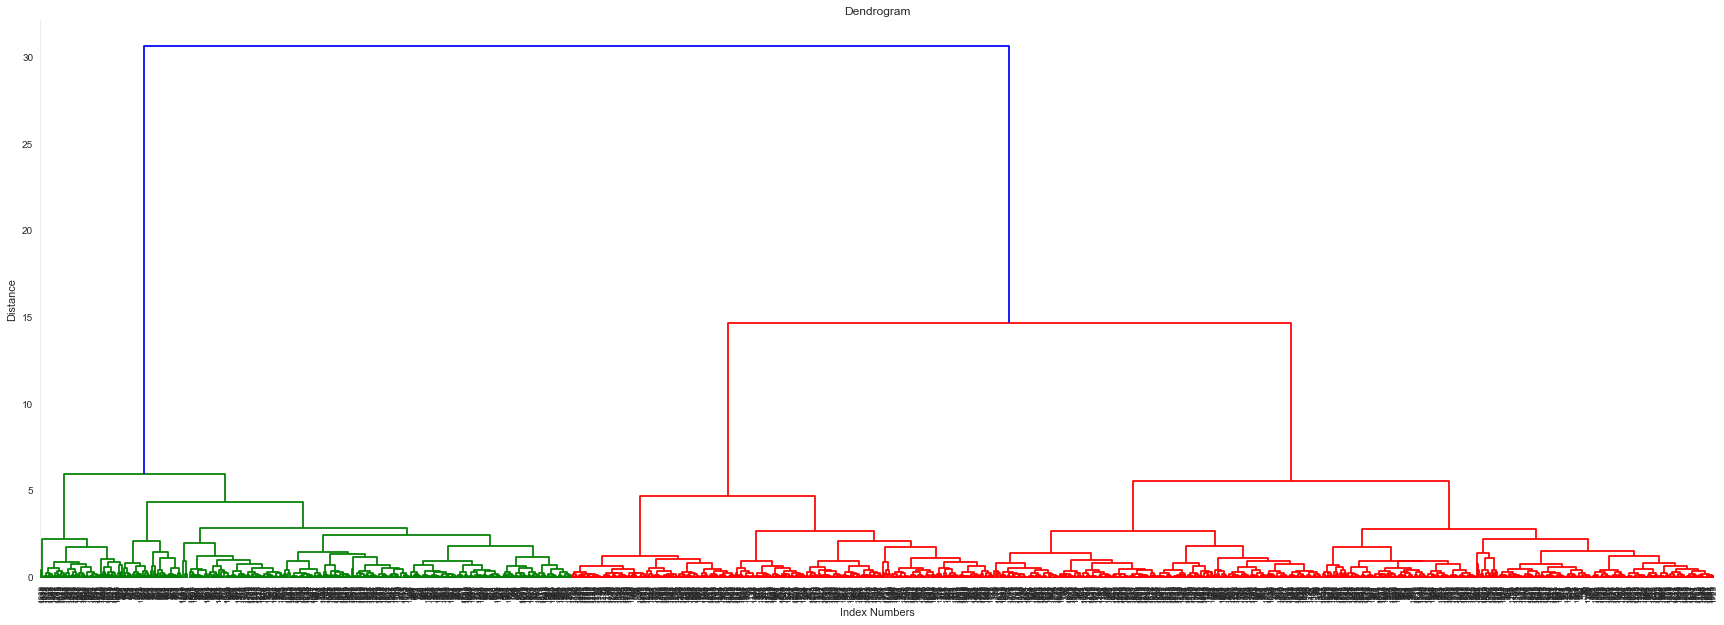

In [29]:
#what does this mean? why is it useful/useless?
plt.figure(figsize=(30, 10))
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

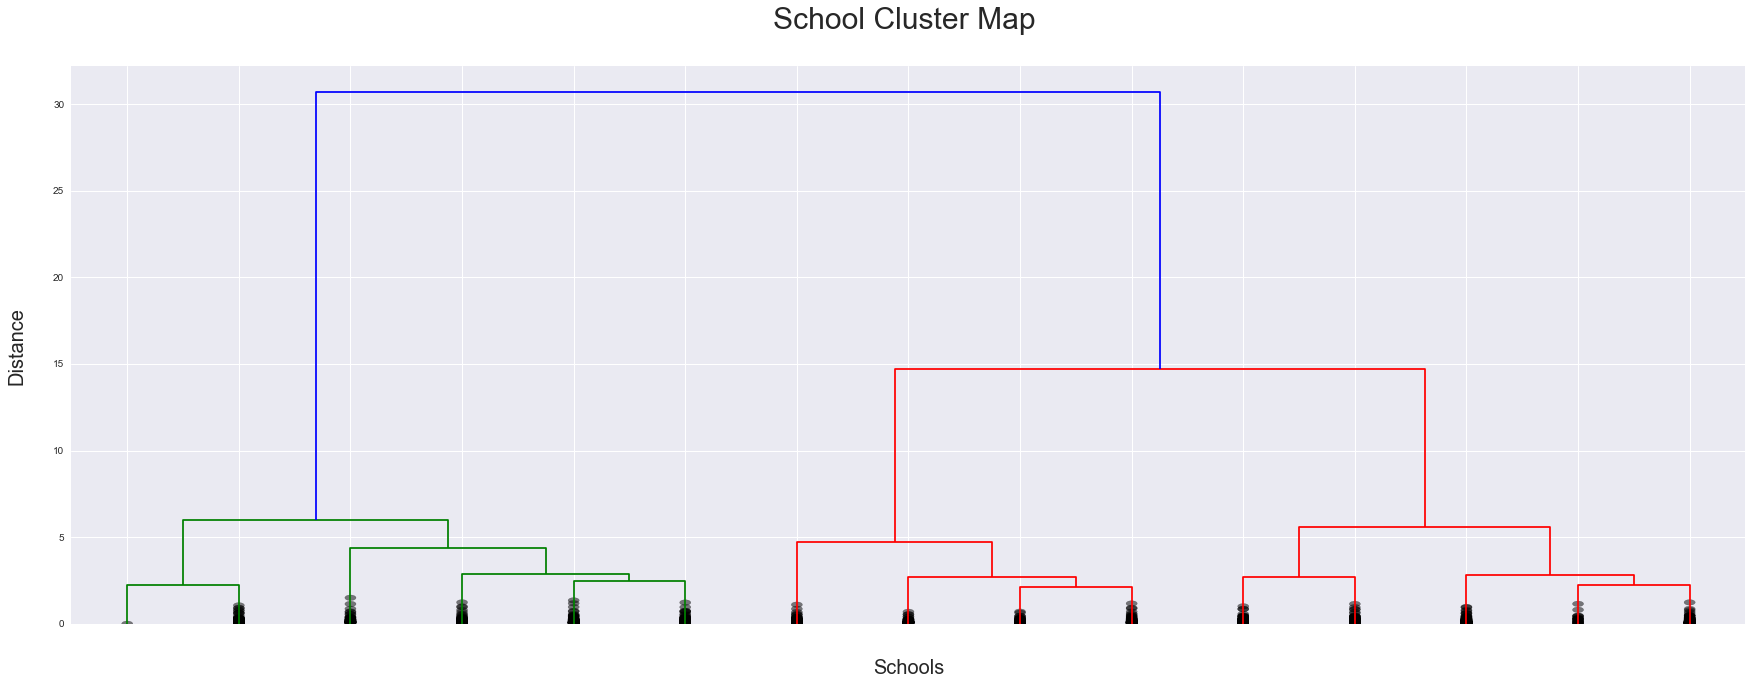

In [30]:
# a truncated version is easier to visualize

plt.figure(figsize=(30, 10))
plt.title('School Cluster Map \n', fontsize=30)
plt.xlabel('\nSchools', fontsize=20)
plt.ylabel('Distance\n', fontsize=20)
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=15,  
    show_leaf_counts=False,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.show()

In [31]:
# Explain why a max depth of 6

max_d = 6
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 3, 3, ..., 3, 1, 3], dtype=int32)

In [32]:
unique, counts = np.unique(clusters, return_counts=True)

print np.asarray((unique, counts)).T

[[  1 598]
 [  2 474]
 [  3 811]]


In [33]:
df2['cluster'] = clusters

/Users/michaelmainzer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [34]:
df3 = pd.read_csv('../../assets/capstone-assets/CCRPI/master15.csv')

In [35]:
df3.drop(['Unnamed: 0'], axis=1, inplace=True)
df3.head()

,year,sysID,sysName,schoolID,schoolName,adress,latitude,longitude,grd,ccrpi,titleI,chrtr
0,2015,601,Appling County,103,Appling County High School,"482 Blackshear Hwy,Baxley,Ga,31513",31.757758,-82.354021,H,73.6,No,No
1,2015,601,Appling County,177,Appling County Elementary School,"680 Blackshear Hwy,Baxley,Ga,31513",31.754824,-82.354584,E,68.8,Yes,No
2,2015,601,Appling County,195,Appling County Middle School,"2997 Blackshear Hwy,Baxley,Ga,31513",31.723121,-82.339760,M,68.8,Yes,No
3,2015,601,Appling County,1050,Altamaha Elementary School,"344 Altamaha School Rd,Baxley,Ga,31513",31.875677,-82.365238,E,72.3,Yes,No
4,2015,601,Appling County,5050,Fourth District Elementary School,"13396 Blackshear Hwy,Surrency,Ga,31563",31.611834,-82.247988,E,68.2,Yes,No


In [36]:
df2.drop(['titleI','chrtr'], axis=1, inplace=True)
df2.head(1)

/Users/michaelmainzer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,ccrpi,sysID,sysName,schoolID,schoolName,grd,locClass,stdTchRatio,expPerStudent,salBenSum,freeLnch,reducedLnch,pctMobile,pctAbs5orLess,pctAbsSix-Fiftn,pctOverFiftn,pctSnapTanfHmls,pctAsian,pctNative,pctBlck,pctHisp,pctMulti,pctWhite,pctMigrant,pctSPED,pctESOL,pctAltProg,pctGiftd,cluster
0,73.6,601,Appling County,103,Appling County High School,H,33.0,-0.00133,0.030486,-0.196321,0.123673,-0.14861,-0.028077,-0.141073,0.033689,0.154379,-0.053013,-0.026174,-0.026553,-0.149997,-0.017973,-0.117462,0.202852,0.194902,0.023484,-0.046515,0.051644,-0.04831,1


In [37]:
data = pd.merge(df2, df3, how='inner', on=['sysID','sysName', 'schoolID','schoolName','grd','ccrpi'])

In [38]:
data = data[['year','sysID','sysName','schoolID','schoolName','adress',
             'latitude','longitude','grd','ccrpi','titleI','chrtr', 'cluster']]
data.head(1)

,year,sysID,sysName,schoolID,schoolName,adress,latitude,longitude,grd,ccrpi,titleI,chrtr,cluster
0,2015,601,Appling County,103,Appling County High School,"482 Blackshear Hwy,Baxley,Ga,31513",31.757758,-82.354021,H,73.6,No,No,1


In [39]:
data.to_csv('../../assets/capstone-assets/CCRPI/master15Cluster.csv')

In [40]:
#Now explain what we're seeing

HTML('<iframe width="1200" height="700" src=https://public.tableau.com/views/CCRPIDashwClusters/CCRPIDash?:showVizHome=no&:embed=true frameborder="0" allowfullscreen=true></iframe>')